## Import Libraries 

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
import random
state = 7
random.seed(state)
np.random.seed(state)

## Read the CSV file 

In [3]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Exploratory Data Analysis

In [4]:
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
plt.style.use('seaborn-whitegrid')
plt.rcParams.update({'font.size': 13})

### Data analysis of Gender 

<AxesSubplot:xlabel='count', ylabel='Gender'>

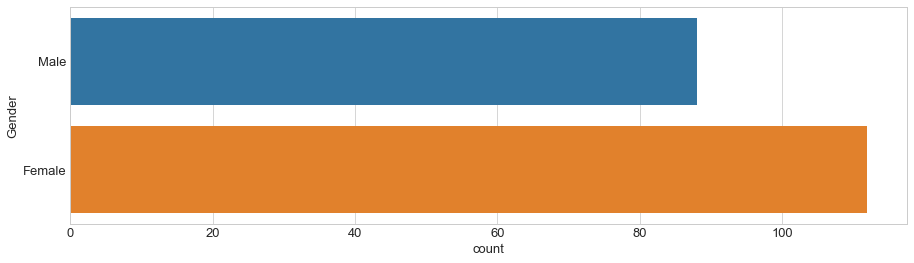

In [9]:
plt.figure(figsize = (15, 4))
sns.countplot(y = df['Gender'])

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Gender'>

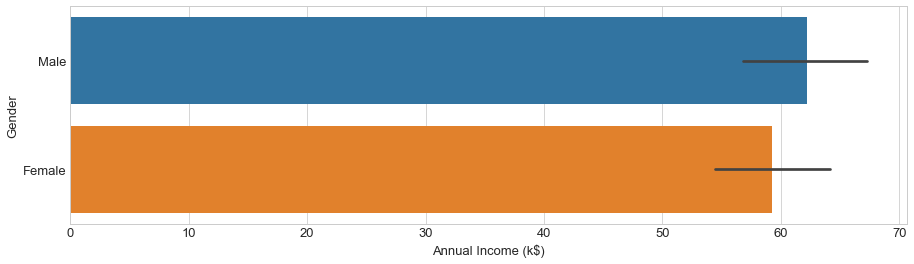

In [10]:
plt.figure(figsize = (15, 4))
sns.barplot(x = df['Annual Income (k$)'], y = df['Gender'])

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Gender'>

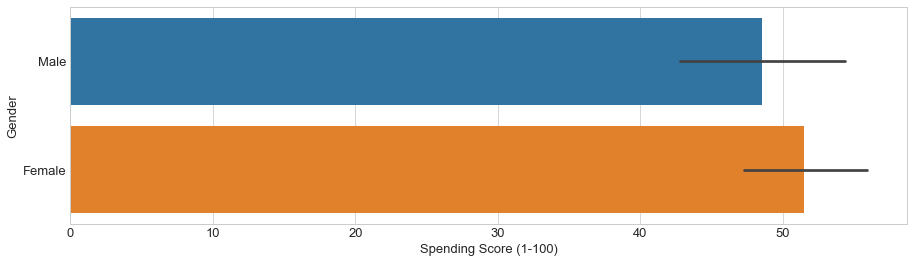

In [11]:
plt.figure(figsize = (15, 4))
sns.barplot(x = df['Spending Score (1-100)'], y = df['Gender'])

#### Females  have a slighlty higher Spending score in average  even though the average Female Annual Income is slightly less than that of Male.

### Distplot for looking at distribution 

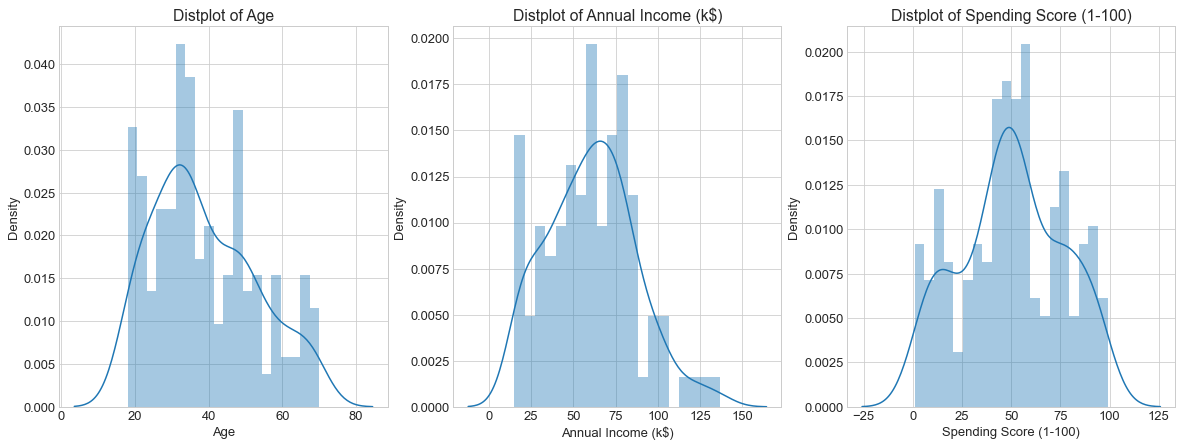

In [12]:
plt.figure(figsize = (20, 7))
n = 0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    sns.distplot(df[x], bins = 20)
    plt.title('Distplot of {}'.format(x))

### Regplot for finding any relationship between numerical features 

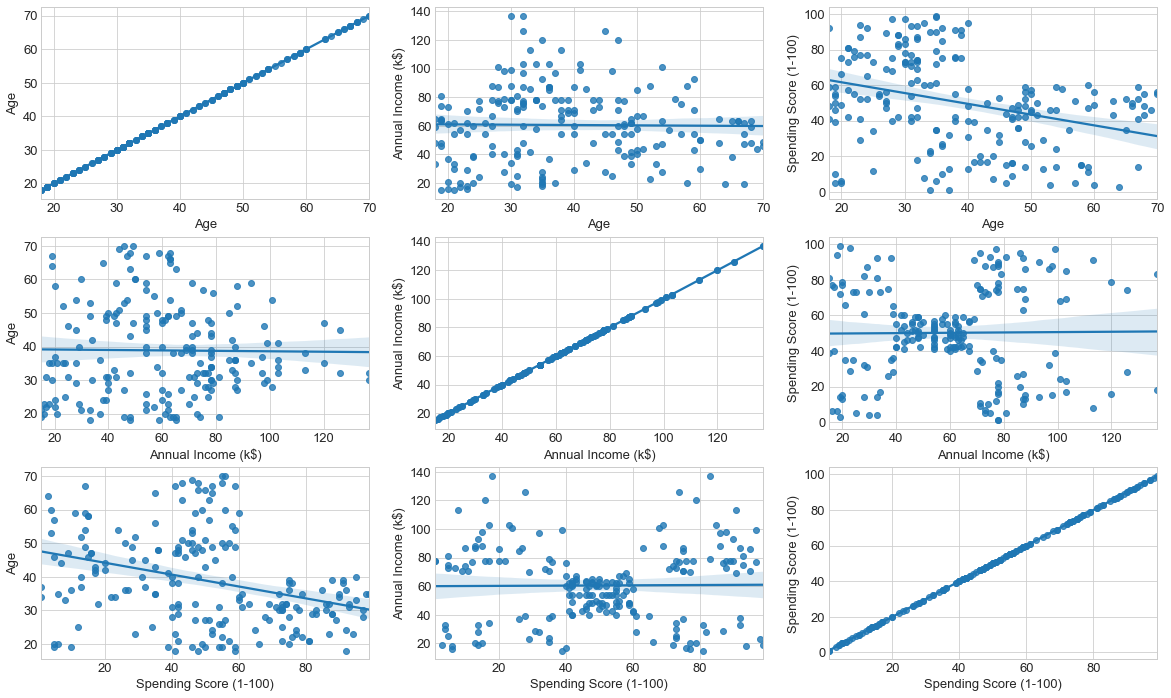

In [13]:
plt.figure(figsize = (20, 12))
n = 0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    for y in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3, 3, n)
        sns.regplot(df[x], df[y])  

#### The only significant relationship we can find here is that Spending score tends to decrease as Age increases

### Scatterplot w.r.t to Gender 

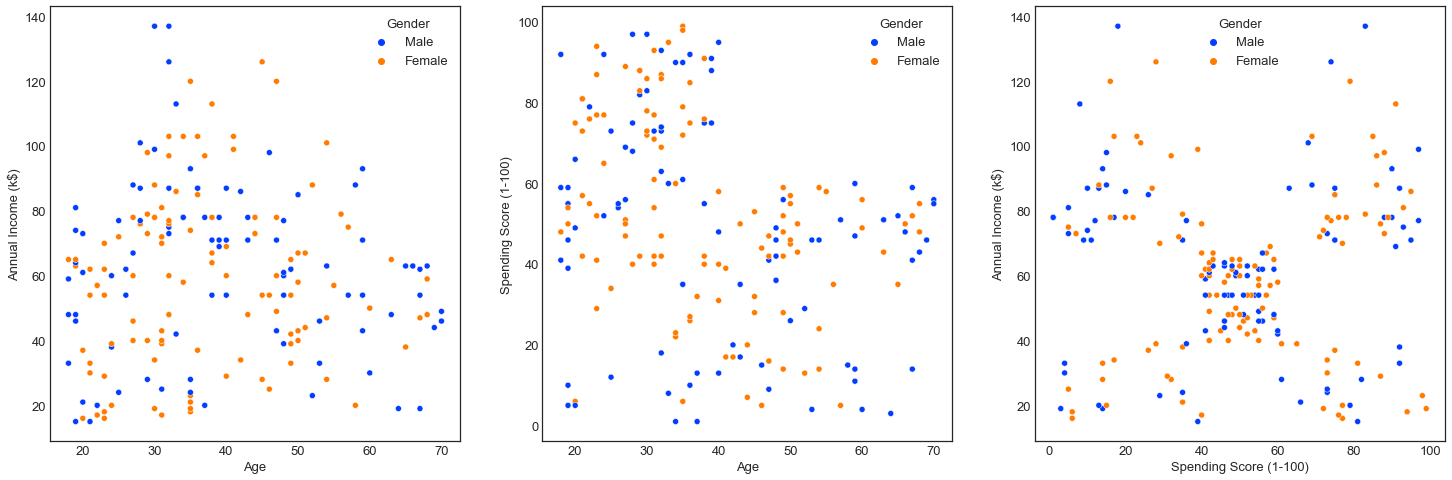

In [14]:
plt.style.use('seaborn-white')
plt.figure(figsize = (25, 8))
plt.subplot(1, 3, 1)
sns.scatterplot(df['Age'], df['Annual Income (k$)'], hue = df['Gender'], palette = 'bright')
plt.subplot(1, 3, 2)
sns.scatterplot(df['Age'], df['Spending Score (1-100)'], hue = df['Gender'], palette = 'bright')
plt.subplot(1, 3, 3)
sns.scatterplot(df['Spending Score (1-100)'], df['Annual Income (k$)'], hue = df['Gender'], palette = 'bright')
plt.show()

#### No significant information is inferred from Scatterplot w.r.t to Gender

# Clustering 

In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [16]:
# Encode Gender feature to numerical values
df['Gender_encoded'] = pd.get_dummies(df['Gender'], drop_first = True)
X = df.drop(['CustomerID','Gender'], axis = 1)

### Lets find the silhouette scores and WCSS for elbow method 

In [17]:
wcss = []
silhouette = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 94)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    if i != 1:
        silhouette.append(silhouette_score(X,kmeans.labels_))

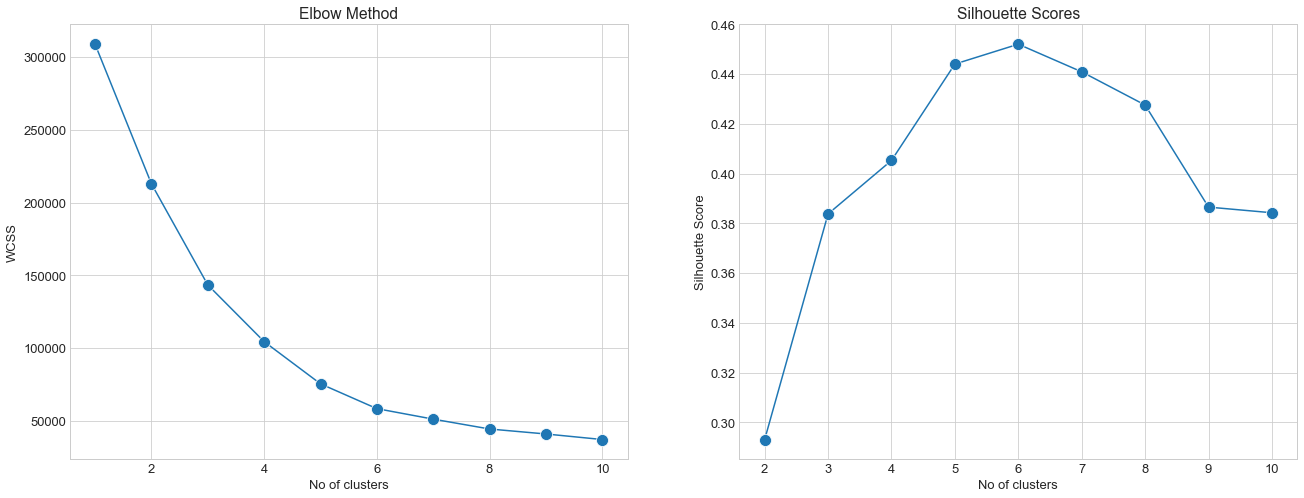

In [18]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (22,8))
plt.subplot(1,2,1)
sns.lineplot(x = range(1, 11), y = wcss, marker = 'o', markersize = 12)
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.subplot(1,2,2)
sns.lineplot(x = range(2, 11), y = silhouette, marker = 'o', markersize = 12)
plt.xlabel('No of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores')
plt.show()

#### We can see that 6 is the optimal number of clusters

##  SilhouetteVisualizer

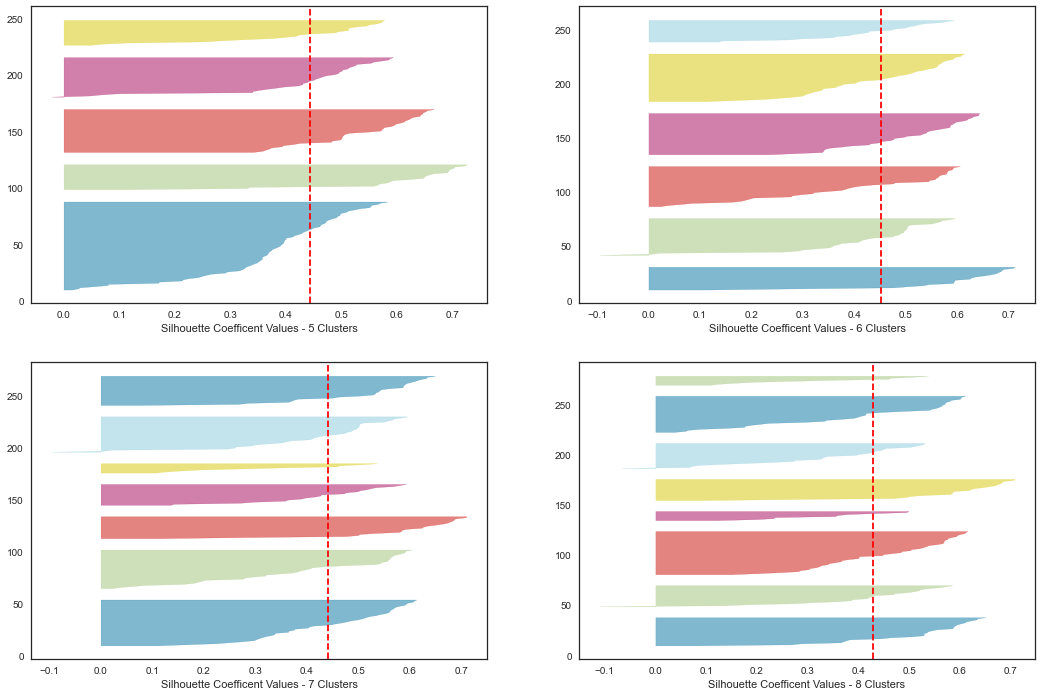

In [19]:
from yellowbrick.cluster import SilhouetteVisualizer
n = 0
plt.style.use('seaborn-white')
plt.figure(figsize = (18, 12))
for i in [5, 6, 7, 8]:
    n += 1
    plt.subplot(2,2,n)
    km = KMeans(n_clusters = i, init = 'k-means++', random_state = 94)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
    plt.xlabel('Silhouette Coefficent Values - {} Clusters'.format(i))
    visualizer.fit(X)

#### When k=6 all the clusters have similar sizes.

## KMeans with n_clusters = 6 

In [20]:
km = KMeans(n_clusters = 6, init = 'k-means++', random_state = state)
km.fit(X)
km.labels_

array([5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0,
       5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 3, 0, 3, 4,
       5, 0, 3, 4, 4, 4, 3, 4, 4, 3, 3, 3, 3, 3, 4, 3, 3, 4, 3, 3, 3, 4,
       3, 3, 4, 4, 3, 3, 3, 3, 3, 4, 3, 4, 4, 3, 3, 4, 3, 3, 4, 3, 3, 4,
       4, 3, 3, 4, 3, 4, 4, 4, 3, 4, 3, 4, 4, 3, 3, 4, 3, 4, 3, 3, 3, 3,
       3, 4, 4, 4, 4, 4, 3, 3, 3, 3, 4, 4, 4, 2, 4, 2, 1, 2, 1, 2, 1, 2,
       4, 2, 1, 2, 1, 2, 1, 2, 1, 2, 4, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [21]:
cluster = df.copy()
cluster['Segment'] = km.labels_ + 1

## Visualize the clusters 

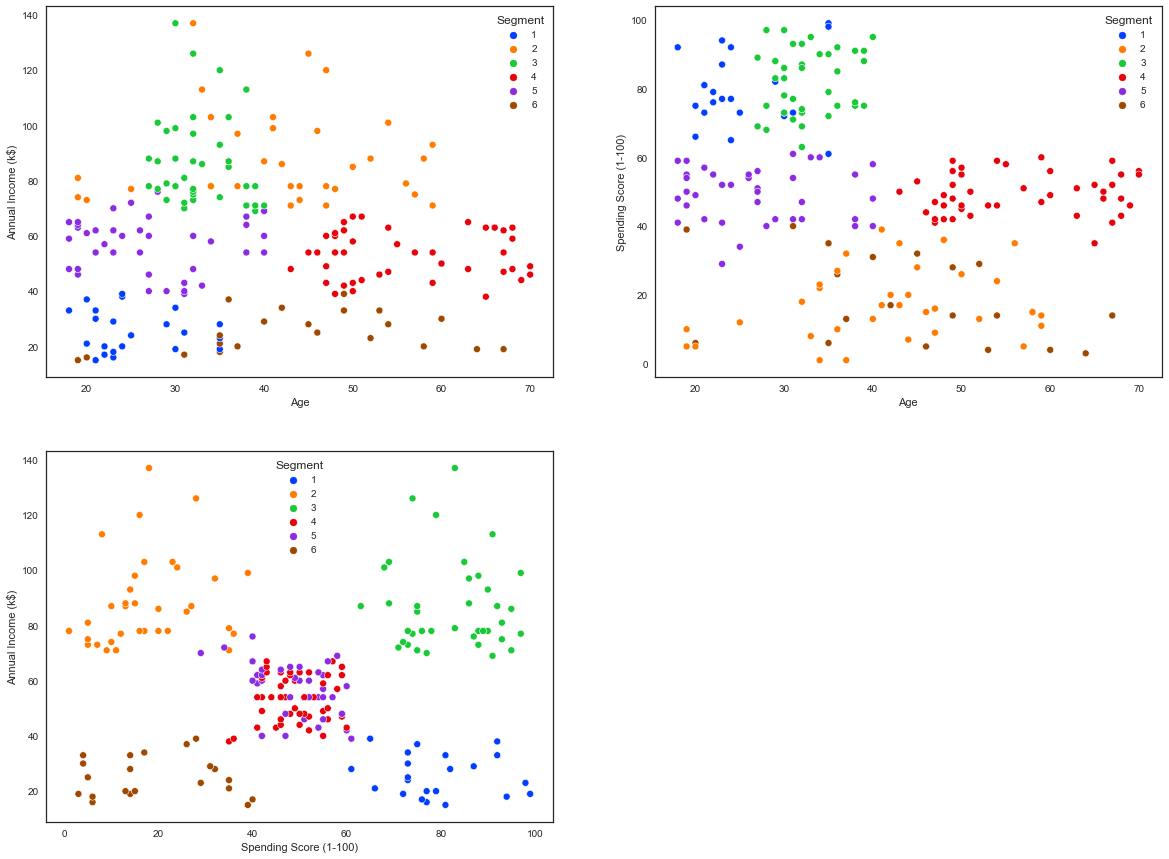

In [22]:
plt.figure(figsize = (20, 15))
plt.subplot(2, 2, 1)
sns.scatterplot(cluster['Age'], cluster['Annual Income (k$)'], hue = cluster['Segment'], palette = 'bright')
plt.subplot(2, 2, 2)
sns.scatterplot(cluster['Age'], cluster['Spending Score (1-100)'], hue = cluster['Segment'], palette = 'bright')
plt.subplot(2, 2, 3)
sns.scatterplot(cluster['Spending Score (1-100)'], cluster['Annual Income (k$)'], hue = cluster['Segment'], palette = 'bright')
plt.show()

### Find the cluster for new value 

In [23]:
print('Cluster {}'.format(km.predict([[22, 50, 60, 1]])[0] + 1))

Cluster 5
